# Modelizado de los datos

In [1]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import plot_confusion_matrix, classification_report
import pickle

In [2]:
# Cargamos nuestro dataframe final
SFC = pd.read_csv('../../TFM/Datos/SFC.csv', sep = ',')
SFC

,Date,Spots,Duration,Peak_energy,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,MPA,Class
0,1996-01-31,13.000000,10.000000,1.860000e-07,274.000000,47.0,219.00,99.000000,315.500000,-12.30,272.0,3
1,1996-03-11,22.000000,12.111111,5.227778e-07,86.000000,52.0,124.00,352.000000,656.000000,20.10,77.0,4
2,1996-03-14,18.000000,6.000000,1.600000e-07,285.000000,59.0,526.00,307.000000,302.000000,-8.90,292.0,5
3,1996-05-05,14.666667,43.444444,1.462222e-06,93.000000,62.5,373.75,370.000000,370.000000,0.05,78.5,5
4,1996-05-06,15.000000,24.666667,7.800000e-07,88.000000,73.0,496.00,360.000000,404.000000,-5.00,83.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4289,2016-12-26,16.000000,14.000000,4.375000e-07,72.000000,25.0,127.00,114.000000,341.000000,-1.90,71.0,2
4290,2016-12-27,16.000000,20.333333,2.066667e-07,236.000000,33.0,79.00,284.000000,430.000000,7.50,239.0,3
4291,2016-12-29,11.000000,9.000000,1.300000e-07,48.000000,20.0,112.00,180.000000,370.000000,5.60,55.0,2
4292,2016-12-30,11.000000,11.500000,1.600000e-07,136.000000,34.5,250.00,419.000000,518.500000,9.50,143.5,4


In [3]:
# Información
SFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4294 entries, 0 to 4293
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          4294 non-null   object 
 1   Spots         4294 non-null   float64
 2   Duration      4294 non-null   float64
 3   Peak_energy   4294 non-null   float64
 4   Central_PA    4294 non-null   float64
 5   Width         4294 non-null   float64
 6   2_I_speed     4294 non-null   float64
 7   2_F_speed     4294 non-null   float64
 8   2_20R_speed   4294 non-null   float64
 9   Acceleration  4294 non-null   float64
 10  MPA           4294 non-null   float64
 11  Class         4294 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 402.7+ KB


In [4]:
# Datos estadísticos
SFC.describe()

,Spots,Duration,Peak_energy,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,MPA,Class
count,4294.000000,4294.000000,4.294000e+03,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000,4294.000000
mean,93.026233,19.765883,3.238684e-06,180.620504,72.567794,388.123024,414.508451,545.821510,1.626137,180.546638,4.242897
std,60.687674,15.924346,6.160425e-06,68.075314,45.080298,198.686372,176.084757,223.872249,16.700271,68.758822,0.989775
min,6.000000,3.000000,1.000000e-07,1.000000,11.000000,10.000000,10.000000,21.000000,-140.257143,3.000000,1.000000
25%,45.000000,11.545455,5.854167e-07,131.000000,44.500000,251.000000,298.062500,394.233333,-4.800000,130.343750,4.000000
50%,80.000000,15.703297,1.489444e-06,182.000000,61.500000,352.775000,389.000000,516.366667,1.400000,181.291667,4.000000
75%,132.000000,22.000000,3.345625e-06,231.465909,86.000000,486.517857,501.191667,652.687500,7.171250,231.191667,5.000000
max,322.000000,225.500000,9.401429e-05,358.000000,360.000000,1442.333333,1247.000000,1838.500000,133.800000,359.000000,6.000000


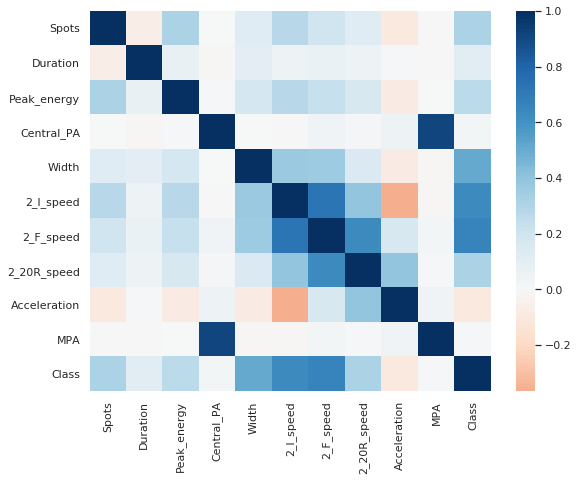

In [5]:
# Vamos a ver la correlación entre las distintas variables
sns.set(rc = {'figure.figsize':(9, 7)})
sns.heatmap(SFC.corr(), cmap = 'RdBu', center = 0)

In [6]:
# Y en números
SFC.corr()

,Spots,Duration,Peak_energy,Central_PA,Width,2_I_speed,2_F_speed,2_20R_speed,Acceleration,MPA,Class
Spots,1.000000,-0.064902,0.311952,0.004265,0.122508,0.275094,0.204296,0.122487,-0.095990,-0.007662,0.315822
Duration,-0.064902,1.000000,0.073769,-0.009084,0.108576,0.051417,0.066187,0.054065,0.018057,-0.007757,0.112830
Peak_energy,0.311952,0.073769,1.000000,0.009637,0.174848,0.275077,0.229461,0.164295,-0.078696,0.005921,0.273113
Central_PA,0.004265,-0.009084,0.009637,1.000000,0.005032,-0.003500,0.044848,0.019331,0.051290,0.918480,0.025560
Width,0.122508,0.108576,0.174848,0.005032,1.000000,0.373034,0.360681,0.146633,-0.082810,-0.011195,0.509378
2_I_speed,0.275094,0.051417,0.275077,-0.003500,0.373034,1.000000,0.730188,0.392384,-0.366090,-0.009444,0.636614
2_F_speed,0.204296,0.066187,0.229461,0.044848,0.360681,0.730188,1.000000,0.636501,0.167726,0.033031,0.667344
2_20R_speed,0.122487,0.054065,0.164295,0.019331,0.146633,0.392384,0.636501,1.000000,0.392714,0.014539,0.313167
Acceleration,-0.095990,0.018057,-0.078696,0.051290,-0.082810,-0.366090,0.167726,0.392714,1.000000,0.042177,-0.094224
MPA,-0.007662,-0.007757,0.005921,0.918480,-0.011195,-0.009444,0.033031,0.014539,0.042177,1.000000,0.012262


Las columnas "Central_PA", "MPA" y "Acceleration" tienen una correlación muy baja con "Class", por lo tanto
no las consideraremos. Asímismo, las columnas "2_I_speed" y "2_F_speed" están bastante correlacionadas entre
si, con lo cual nos quedaremos solo con "2_I_speed", que está menos correlacionada con "2_20R_speed".

In [7]:
# Entonces, con lo que hemos dicho:
# Features
X = SFC[['Spots', 'Duration', 'Peak_energy', 'Width', '2_I_speed', '2_20R_speed']]
# Target
Y = SFC['Class']

In [8]:
# Dividimos nuestros datos en conjuntos de train y test, al 85-15 para maximizar los datos de entrenamiento
# sin perder variabilidad
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

In [9]:
# Comprobamos
print(f'Tamaño total: {len(X)}')
print(f'Tamaño train: {len(X_train)}')
print(f'Tamaño test: {len(X_test)}')

Tamaño total: 4294
Tamaño train: 3649
Tamaño test: 645


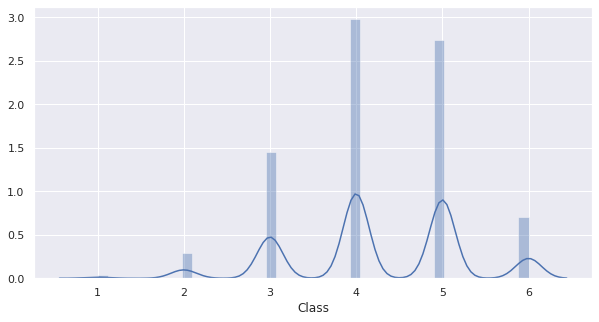

In [10]:
# Vamos a ver la distribución de nuestra variable target, "Class"
sns.set(rc = {'figure.figsize': (10, 5)})
sns.distplot(SFC['Class'])

Vamos a modelizar. Utilizaremos f1_score como métrica, nos interesa pues es una combinación de precision y recall.

In [11]:
# Para ello crearemos un "scorer", dado que por ejemplo para validación cruzada no se puede usar simplemente f1.
# Lo hacemos con la opción "weighted" para la media
f1_scorer = make_scorer(sklearn.metrics.f1_score, average = 'weighted')

### LOGISTIC REGRESSION

In [12]:
# Creamos la instancia y entrenamos
log = LogisticRegression(multi_class = 'ovr', random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [13]:
# Métrica inicial en train
log_f1 = f1_scorer(log, X_train, Y_train)
print(f'f1_score: {log_f1:.1%}')

f1_score: 55.4%


In [14]:
# Hacemos validación cruzada y vemos la media
log_f1_cv = cross_val_score(log, X_train, Y_train, cv = 10, scoring = f1_scorer).mean()
print(f'cv_f1_score: {log_f1_cv:.1%}')

cv_f1_score: 55.0%


In [15]:
# Vamos a optimizar el modelo
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}
log_grid = GridSearchCV(log, param_grid, cv = 10, scoring = f1_scorer)
log_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='ovr',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [16]:
# Mejor métrica y parámetros encontrados
print(f'Grid f1_score: {log_grid.best_score_:.1%}') 
print(f'Best parameters: {log_grid.best_params_:}')

Grid f1_score: 55.0%
Best parameters: {'C': 0.001}


In [17]:
# Entrenamos el modelo final con dichos parámetros
log_best = LogisticRegression(multi_class = 'ovr', C = 0.001, random_state = 0)
log_best.fit(X_train, Y_train)
log_best_model = log_best.fit(X_train, Y_train)

In [18]:
# Comprobamos el modelo final con los datos de test
log_f1_best = f1_scorer(log_best, X_test, Y_test)
print(f'best_f1_score: {log_f1_best:.1%}')

best_f1_score: 52.9%


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        24
           3       0.49      0.25      0.33       124
           4       0.49      0.76      0.60       237
           5       0.66      0.60      0.63       219
           6       0.79      0.39      0.53        38

    accuracy                           0.56       645
   macro avg       0.41      0.33      0.35       645
weighted avg       0.55      0.56      0.53       645



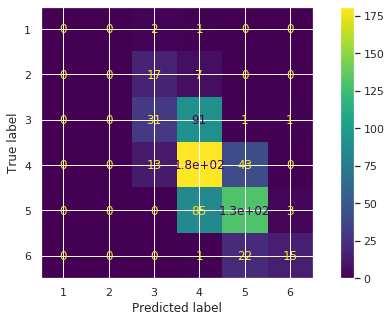

In [19]:
# Classification report y matriz de confusión
print(classification_report(Y_test, log_best.predict(X_test)))
plot_confusion_matrix(log_best_model, X_test, Y_test)

### K-NEIGHBORS

In [20]:
# Este método está basado en distancias, por lo tanto vamos a escalar los datos
ss = StandardScaler()
X_scaled_train = ss.fit_transform(X_train)
X_scaled_test = ss.fit_transform(X_test)

In [21]:
# Comenzamos con un valor aleatorio de n_neighbors
n_neighbors = 10
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_scaled_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [22]:
# Métrica inicial
knn_f1 = f1_scorer(knn, X_scaled_train, Y_train)
print(f'f1_score: {knn_f1:.1%}')

f1_score: 65.0%


In [23]:
# Validación cruzada
knn_f1_cv = cross_val_score(knn, X_scaled_train, Y_train, cv = 10, scoring = f1_scorer).mean()
print(f'cv_f1_score: {knn_f1_cv:.1%}')

cv_f1_score: 56.8%


In [24]:
# Optimización
param_grid = {'n_neighbors': np.arange(1, 50)}
knn_grid = GridSearchCV(knn, param_grid, cv = 10, scoring = f1_scorer)
knn_grid.fit(X_scaled_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [25]:
# Mejor métrica y parámetros
print(f'Grid f1_score: {knn_grid.best_score_:.1%}') 
print(f'Best parameters: {knn_grid.best_params_:}')

Grid f1_score: 58.9%
Best parameters: {'n_neighbors': 37}


In [26]:
# Modelo final
n_neighbors = 37
knn_best = KNeighborsClassifier(n_neighbors)
knn_best.fit(X_scaled_train, Y_train)
knn_best_model = knn_best.fit(X_scaled_train, Y_train)

In [27]:
# Comprobamos modelo final con los datos de test
knn_f1_best = f1_scorer(knn_best, X_scaled_test, Y_test)
print(f'best_f1_score: {knn_f1_best:.1%}')

best_f1_score: 57.3%


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.75      0.12      0.21        24
           3       0.55      0.40      0.47       124
           4       0.54      0.66      0.59       237
           5       0.64      0.70      0.67       219
           6       0.74      0.37      0.49        38

    accuracy                           0.59       645
   macro avg       0.54      0.38      0.41       645
weighted avg       0.59      0.59      0.57       645



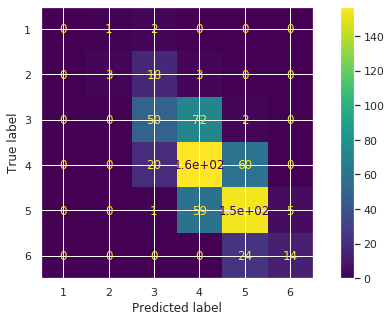

In [28]:
# Classification report y matriz de confusión
print(classification_report(Y_test, knn_best.predict(X_scaled_test)))
plot_confusion_matrix(knn_best_model, X_scaled_test, Y_test)

### SVM

In [29]:
# Modelo inicial
svc = SVC(random_state = 0)
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
# Métrica inicial en train
svc_f1 = f1_scorer(svc, X_train, Y_train)
print(f'f1_score: {log_f1:.1%}')

f1_score: 55.4%


In [31]:
# Validación cruzada
svc_f1_cv = cross_val_score(svc, X_train, Y_train, cv = 10, scoring = f1_scorer).mean()
print(f'cv_f1_score: {svc_f1_cv:.1%}')

cv_f1_score: 57.1%


In [32]:
# Optimización
param_grid = {'C': [0.1, 1, 10, 100]}
svc_grid = GridSearchCV(svc, param_grid, cv = 10, scoring = f1_scorer)
svc_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None, param_grid={'C': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=weighted), verbose=0)

In [33]:
# Mejor métrica y parámetros
print(f'Grid f1_score: {svc_grid.best_score_:.1%}') 
print(f'Best parameters: {svc_grid.best_params_:}')

Grid f1_score: 60.2%
Best parameters: {'C': 100}


In [34]:
# Mejor modelo
svc_best = SVC(C = 100, random_state = 0)
svc_best.fit(X_train, Y_train)
svc_best_model = svc_best.fit(X_train, Y_train)

In [35]:
# Métrica final del mejor modelo con los datos de test
svc_f1_best = f1_scorer(svc_best, X_test, Y_test)
print(f'best_f1_score: {svc_f1_best:.1%}')

best_f1_score: 60.3%


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        24
           3       0.59      0.61      0.60       124
           4       0.58      0.71      0.64       237
           5       0.67      0.62      0.65       219
           6       0.78      0.47      0.59        38

    accuracy                           0.62       645
   macro avg       0.44      0.40      0.41       645
weighted avg       0.60      0.62      0.60       645



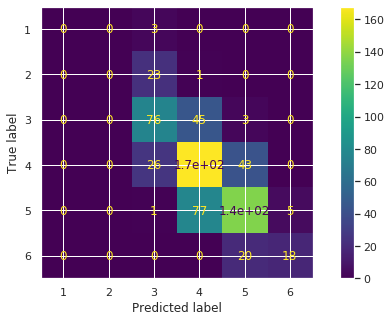

In [36]:
# Classification report y matriz de confusión
print(classification_report(Y_test, svc_best.predict(X_test)))
plot_confusion_matrix(svc_best_model, X_test, Y_test)

### XGBoost

In [37]:
# Modelo inicial
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
# Métrica inicial
xgb_f1 = f1_scorer(xgb, X_train, Y_train)
print(f'f1_score: {xgb_f1:.1%}')

f1_score: 99.0%


In [39]:
# Esta métrica es irreal, se debe a que debemos "tunearlo", de hecho si comprobamos en test, el resultado es muy distinto...
xgb_f1 = f1_scorer(xgb, X_test, Y_test)
print(f'f1_score: {xgb_f1:.1%}')

f1_score: 56.4%


In [40]:
# Validación cruzada
xgb_f1_cv = cross_val_score(xgb, X_train, Y_train, cv = 10, scoring = f1_scorer).mean()
print(f'cv_f1_score: {xgb_f1_cv:.1%}')

cv_f1_score: 58.4%


In [41]:
# Optimización
param_grid = {'n_estimators': np.arange(10, 1000, 200), 'max_depth': np.arange(2, 10, 1),
              'learning_rate': np.arange(0.1, 0.5, 0.1)}
xgb_grid = RandomizedSearchCV(xgb, param_grid, cv = 10, scoring = f1_scorer)
xgb_grid.fit(X_train, Y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=10...
                                           validate_parameters=1,
                                           verbosity=None),
                   iid='deprecated', n_iter=10, n_jobs

In [42]:
# Mejor métrica y parámetros
print(f'Grid f1_score: {xgb_grid.best_score_:.1%}') 
print(f'Best parameters: {xgb_grid.best_params_:}')

Grid f1_score: 59.7%
Best parameters: {'n_estimators': 210, 'max_depth': 2, 'learning_rate': 0.2}


In [43]:
# Mejor modelo
xgb_best = XGBClassifier(n_estimators = 210, max_depth = 2, learning_rate = 0.2)
xgb_best.fit(X_train, Y_train)
xgb_best_model = xgb_best.fit(X_train, Y_train)
# Nota: Al haberse hecho la búsqueda de parámetros con RandomizedSearchCV, puede que en otra ejecución del código
# los parámetros sean distintos, cambiando por tanto el f1_score.

In [44]:
# Métrica final del mejor modelo con los datos de test
xgb_f1_best = f1_scorer(xgb_best, X_test, Y_test)
print(f'best_f1_score: {xgb_f1_best:.1%}')

best_f1_score: 60.2%


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.86      0.25      0.39        24
           3       0.59      0.60      0.60       124
           4       0.59      0.67      0.62       237
           5       0.65      0.60      0.63       219
           6       0.53      0.53      0.53        38

    accuracy                           0.61       645
   macro avg       0.53      0.44      0.46       645
weighted avg       0.61      0.61      0.60       645



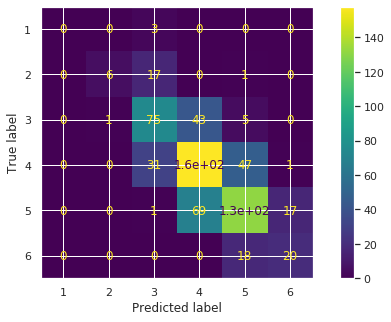

In [45]:
# Classification report y matriz de confusión
print(classification_report(Y_test, xgb_best.predict(X_test)))
plot_confusion_matrix(xgb_best_model, X_test, Y_test)

### DECISION TREE

In [46]:
# Modelo inicial
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [47]:
# Métrica inicial en train
tree_f1 = f1_scorer(tree, X_train, Y_train)
print(f'f1_score: {tree_f1:.1%}')

f1_score: 100.0%


Estamos en el mismo caso anterior, la métrica inicial no es real...

In [48]:
# Validación cruzada
tree_f1_cv = cross_val_score(tree, X_train, Y_train, cv = 10, scoring = f1_scorer).mean()
print(f'cv_f1_score: {tree_f1_cv:.1%}')

cv_f1_score: 50.7%


In [49]:
# Optimización
param_grid = {'max_depth': np.arange(1, 10, 1), 'min_samples_leaf': np.arange(1, 50, 2),
              'min_samples_split': np.arange(1, 30, 2)}
tree_grid = GridSearchCV(tree, param_grid, cv = 10, scoring = f1_scorer)
tree_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='depr...', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([ 1,

In [50]:
# Mejor métrica y parámetros
print(f'Grid f1_score: {tree_grid.best_score_:.1%}') 
print(f'Best parameters: {tree_grid.best_params_:}')

Grid f1_score: 58.6%
Best parameters: {'max_depth': 9, 'min_samples_leaf': 27, 'min_samples_split': 3}


In [51]:
# Mejor modelo
tree_best = DecisionTreeClassifier(max_depth = 9, min_samples_leaf = 27, min_samples_split = 3, random_state = 0)
tree_best.fit(X_train, Y_train)
tree_best_model = tree_best.fit(X_train, Y_train)

In [52]:
# Métrica final en test
tree_f1_best = f1_scorer(tree_best, X_test, Y_test)
print(f'best_f1_score: {tree_f1_best:.1%}')

best_f1_score: 57.3%


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.38      0.33      0.36        24
           3       0.53      0.53      0.53       124
           4       0.55      0.62      0.58       237
           5       0.64      0.62      0.63       219
           6       0.76      0.42      0.54        38

    accuracy                           0.58       645
   macro avg       0.48      0.42      0.44       645
weighted avg       0.58      0.58      0.57       645



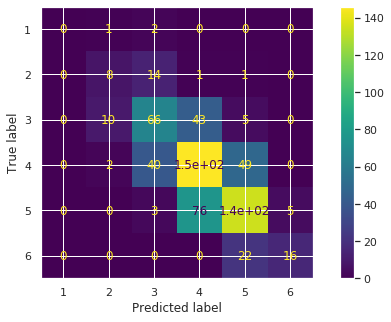

In [53]:
# Classification report y matriz de confusión
print(classification_report(Y_test, tree_best.predict(X_test)))
plot_confusion_matrix(tree_best_model, X_test, Y_test)

### RANDOM FOREST

In [54]:
# Modelo inicial
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [55]:
# Métrica inicial en train
rf_f1 = f1_scorer(rf, X_train, Y_train)
print(f'f1_score: {rf_f1:.1%}')

f1_score: 100.0%


In [56]:
# Validación cruzada
rf_f1_cv = cross_val_score(rf, X_train, Y_train, cv = 10, scoring = f1_scorer).mean()
print(f'cv_f1_score: {rf_f1_cv:.1%}')

cv_f1_score: 60.6%


In [57]:
# Optimización
param_grid = {'max_depth': np.arange(1, 10, 1), 'min_samples_leaf': np.arange(3, 20, 2),
              'min_samples_split': np.arange(1, 30, 5)}
rf_grid = GridSearchCV(rf, param_grid, cv = 10, scoring = f1_scorer)
rf_grid.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                  

In [58]:
# Mejor métrica y parámetros
print(f'Grid f1_score: {rf_grid.best_score_:.1%}') 
print(f'Best parameters: {rf_grid.best_params_:}')

Grid f1_score: 61.6%
Best parameters: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 11}


In [59]:
# Mejor modelo
rf_best = RandomForestClassifier(max_depth = 8, min_samples_leaf = 3, min_samples_split = 11, random_state = 0)
rf_best.fit(X_train, Y_train)
rf_best_model = rf_best.fit(X_train, Y_train)

In [60]:
# Métrica final en test
rf_f1_best = f1_scorer(rf_best, X_test, Y_test)
print(f'best_f1_score: {rf_f1_best:.1%}')

best_f1_score: 60.3%


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       1.00      0.12      0.22        24
           3       0.61      0.57      0.59       124
           4       0.57      0.73      0.64       237
           5       0.67      0.60      0.63       219
           6       0.65      0.45      0.53        38

    accuracy                           0.61       645
   macro avg       0.58      0.41      0.44       645
weighted avg       0.63      0.61      0.60       645



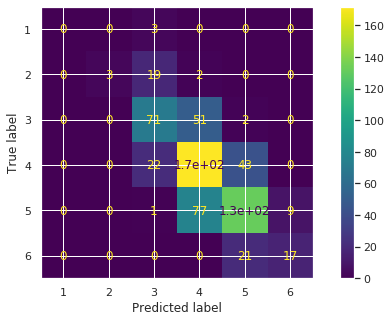

In [61]:
# Classification report y matriz de confusión
print(classification_report(Y_test, rf_best.predict(X_test)))
plot_confusion_matrix(rf_best_model, X_test, Y_test)

Vamos a probar ensamblando varios modelos, a ver si obtenemos una mejor puntuación

### Ensembled

In [62]:
# Probamos ensamblando los dos que han obtenido mejor puntuación, SVM y RandomForest
models = []
models.append(('SVM', svc_best_model))
models.append(('RandomForest', rf_best_model))

ens = VotingClassifier(models)
ens.fit(X_train, Y_train)
ens_best = ens.fit(X_train, Y_train)

In [63]:
# Métrica en train
ens_f1 = f1_scorer(ens, X_train, Y_train)
print(f'f1_score: {ens_f1:.1%}')

f1_score: 67.0%


In [64]:
# Validación cruzada
ens_f1_cv = cross_val_score(ens, X_train, Y_train, cv = 10, scoring = f1_scorer).mean()
print(f'cv_f1_score: {ens_f1_cv:.1%}')

cv_f1_score: 60.9%


In [65]:
# Métrica final en test
ens_f1_best = f1_scorer(ens, X_test, Y_test)
print(f'f1_score: {ens_f1_best:.1%}')

f1_score: 61.2%


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       1.00      0.12      0.22        24
           3       0.61      0.69      0.65       124
           4       0.58      0.71      0.64       237
           5       0.68      0.58      0.62       219
           6       0.77      0.45      0.57        38

    accuracy                           0.62       645
   macro avg       0.61      0.43      0.45       645
weighted avg       0.64      0.62      0.61       645



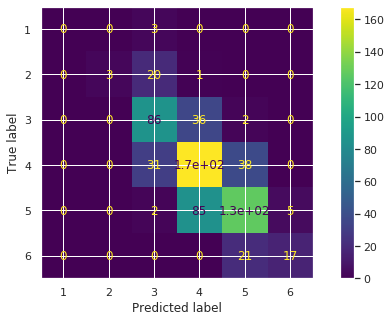

In [66]:
# Classification report y matriz de confusión
print(classification_report(Y_test, ens_best.predict(X_test)))
plot_confusion_matrix(ens_best, X_test, Y_test)

Para comparar mejor los resultados, vamos a reunir las métricas finales en un dataframe

In [67]:
# Creamos el dataframe y ordenamos
results = pd.DataFrame({'Modelo': ['LogisticRegression', 'K_Neighbors', 'SVM', 'XGBoost', 'DecisionTree', 
                                   'RandomForest', 'Ensembled'], 
                        'f1_score': [log_f1_best, knn_f1_best, svc_f1_best, xgb_f1_best, tree_f1_best, rf_f1_best,
                                     ens_f1_best]})
results.sort_values(by = 'f1_score' , inplace = True)
results

,Modelo,f1_score
0,LogisticRegression,0.529176
1,K_Neighbors,0.572684
4,DecisionTree,0.573106
3,XGBoost,0.601728
5,RandomForest,0.602780
2,SVM,0.603464
6,Ensembled,0.612131


El mejor modelo es el "ensembled", con un f1_score medio de 0.61